In [3]:
import pandas as pd
import ast
import re
"""
# 初始化一个空列表，用于存储解析后的数据
data = []

with open('log.txt', 'r') as file:
    for line in file:
        # 忽略以 '(' 开头的无关行
        if not line.strip().startswith('('):
            # 预处理：将Array(0.6296296, dtype=float32)转换为0.6296296
            # 通过正则表达式找到Array(...)并提取数字部分
            line = re.sub(r"Array\(([^,]+), dtype=[\w\d]+\)", r"\1", line)
            try:
                # 将处理后的字符串行转换为字典
                row = ast.literal_eval(line)
                data.append(row)
            except ValueError as e:
                print(f"Error converting line to dict: {e}")
                continue
df = pd.DataFrame(data)

df = pd.read_csv('real_data_experiment.csv')
df2 = pd.read_csv('random.csv')
df = pd.concat([df, df2], axis=0)
print(df.head())
"""

df = pd.read_csv('results_2.csv')


In [4]:
df['dataset'].unique()

array(['Mice', 'Activity', 'Isolet'], dtype=object)

In [16]:
from matplotlib import font_manager

# 列出所有可用的字体名称
fonts = set([f.name for f in font_manager.fontManager.ttflist])

# 打印字体列表
for font in sorted(fonts):
    print(font)

# 筛选出可能支持中文的字体
# 常见的中文字体关键词如"SimHei", "Heiti", "Song", "Kai", "FangSong", "Microsoft YaHei"等
chinese_fonts = [f for f in fonts if 'SimHei' in f or 'YaHei' in f or 'Heiti' in f or 'Song' in f or 'Kai' in f or 'FangSong' in f]
print("可能支持中文的字体：")
for font in sorted(chinese_fonts):
    print(font)



DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Inconsolata
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
Source Code Pro
Ubuntu
Ubuntu Condensed
Ubuntu Mono
cmb10
cmex10
cmmi10
cmr10
cmss10
cmsy10
cmtt10
可能支持中文的字体：


In [17]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")
# 设置Matplotlib支持中文显示
matplotlib.rcParams['font.sans-serif'] = ['cmb10']  # 指定默认字体为SimHei
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题


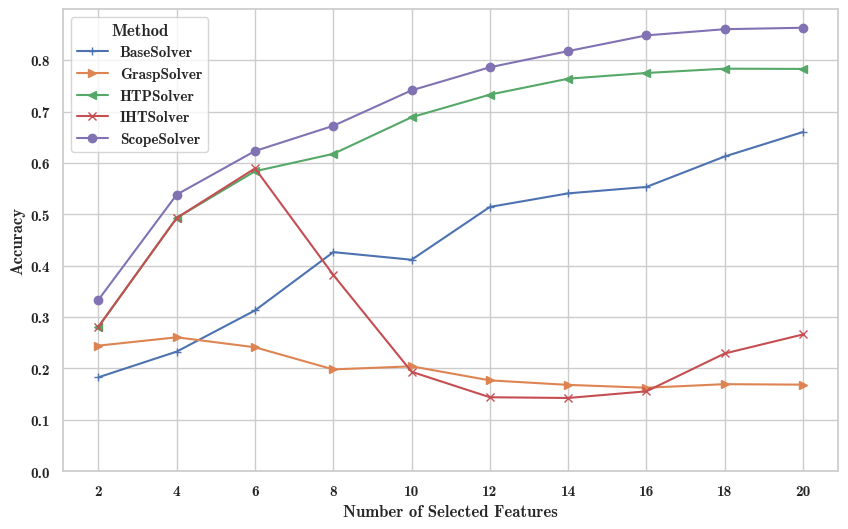

In [28]:
dataset = "Mice"
subset_stats = df[(df['dataset'] == dataset)].groupby(['method', 'num_selected_features'])['accuracy'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(10, 6)) # 设置图像大小
methods = subset_stats['method'].unique()
for method, marker in zip(methods, ['+', '>', '<', 'x', 'o']):
    method_data = subset_stats[subset_stats['method'] == method]
    plt.plot(method_data['num_selected_features'], method_data['mean'], marker=marker, label=method)
    #plt.fill_between(method_data['num_selected_features'], 
    #                 method_data['mean'] - method_data['std'], 
    #                 method_data['mean'] + method_data['std'], 
    #                 alpha=0.1)
all_features = subset_stats['num_selected_features'].unique()
plt.xticks(all_features)
#plt.title(f'Accuracy vs Number of Selected Features for {dataset}')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.legend(title='Method')
plt.ylim(bottom=0)
plt.show()

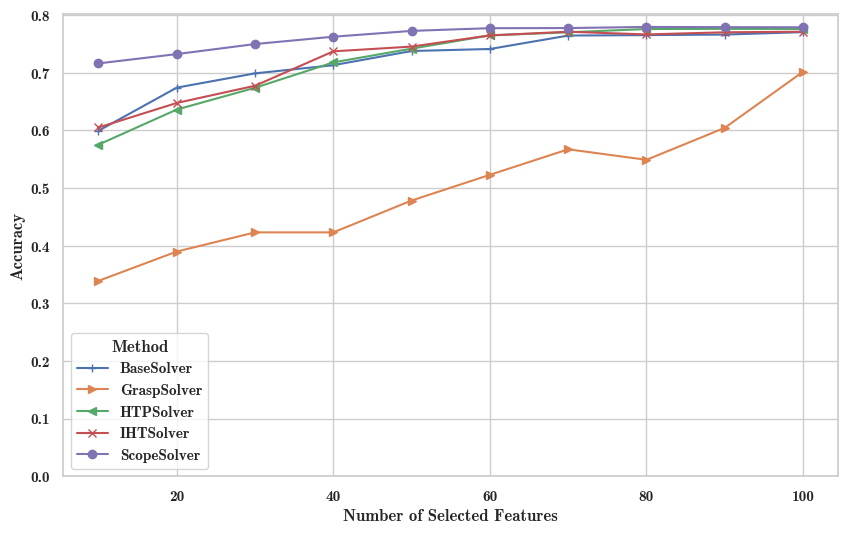

In [27]:
dataset = "Activity"
subset_stats = df[(df['dataset'] == dataset)].groupby(['method', 'num_selected_features'])['accuracy'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(10, 6)) # 设置图像大小
methods = subset_stats['method'].unique()
for method, marker in zip(methods, ['+', '>', '<', 'x', 'o']):
    method_data = subset_stats[subset_stats['method'] == method]
    plt.plot(method_data['num_selected_features'], method_data['mean'], marker=marker, label=method)
    #plt.fill_between(method_data['num_selected_features'], 
    #                 method_data['mean'] - method_data['std'], 
    #                 method_data['mean'] + method_data['std'], 
    #                alpha=0.1)
#plt.title(f'Accuracy vs Number of Selected Features for {dataset}')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.legend(title='Method')
plt.ylim(bottom=0)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


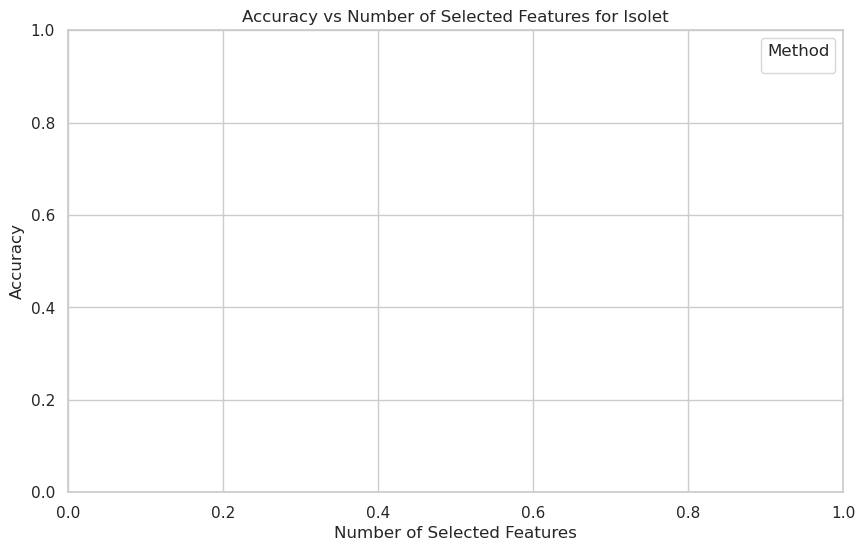

In [17]:
dataset = "Isolet"
subset = df[(df['dataset'] == "Isolet")].groupby(['method', 'num_selected_features'])[['accuracy']].mean().reset_index()
plt.figure(figsize=(10, 6)) # 设置图像大小
sns.lineplot(data=subset, x='num_selected_features', y='accuracy', hue='method', marker='o')
plt.title(f'Accuracy vs Number of Selected Features for {dataset}')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.legend(title='Method')
plt.show()